Select the type of interaction potential:
1. Lennard-Jones
2. Exponential Repulsion
3. Linear Attraction


Enter the number of your choice (1/2/3):  1


Error creating video: Command '['ffmpeg', '-r', '10', '-i', 'output_images/time_%03d.png', '-vf', 'fps=25,format=yuv420p', 'coalescence.mp4']' returned non-zero exit status 1.


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

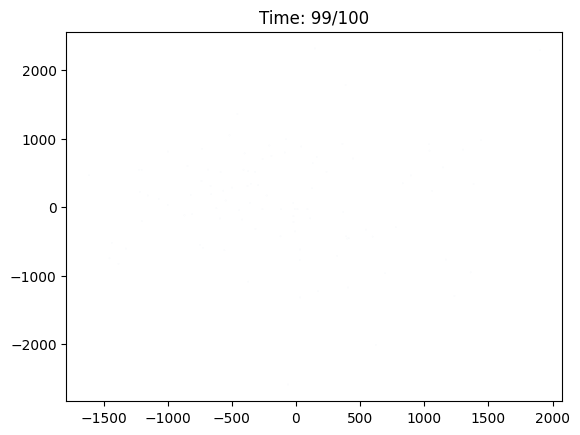

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import subprocess

class CoalescenceSimulation:
    def __init__(self, n_particles, timesteps, max_velocity, coalescence_center, output_folder, output_zip_file, output_video_file, particle_radius, viscosity, surface_attraction, temperature, pH, interaction_type):
        """
        Initialize the CoalescenceSimulation object.

        :param n_particles: Number of particles in the emulsion.
        :param timesteps: Number of time steps for the simulation.
        :param max_velocity: Maximum velocity of particles.
        :param coalescence_center: Center where coalescence occurs.
        :param output_folder: Folder to save the images and video.
        :param output_zip_file: Name of the output zip file.
        :param output_video_file: Name of the output video file.
        :param particle_radius: Radius of each particle.
        :param viscosity: Viscosity of the medium.
        :param surface_attraction: Strength of attraction to a surface (0 for no attraction).
        :param temperature: Temperature of the emulsion.
        :param pH: pH of the emulsion.
        :param interaction_type: Type of interaction potential ("lennard-jones", "exponential-repulsion", or "linear-attraction").
        """
        self.n_particles = n_particles
        self.timesteps = timesteps
        self.max_velocity = max_velocity
        self.coalescence_center = coalescence_center
        self.output_folder = output_folder
        self.output_zip_file = output_zip_file
        self.output_video_file = output_video_file
        self.particle_radius = particle_radius
        self.viscosity = viscosity
        self.surface_attraction = surface_attraction
        self.temperature = temperature
        self.pH = pH
        self.interaction_type = interaction_type
        self.image_file_paths = []

        # Create the output folder if it doesn't exist
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        # Configure plot settings
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.title("Coalescence Simulation")

    def calculate_interaction_forces(self, positions_x, positions_y):
        if self.interaction_type == "lennard-jones":
            # Implement Lennard-Jones potential
            # You can replace this with your specific implementation
            # This is just a placeholder
            forces_x = np.zeros(self.n_particles)
            forces_y = np.zeros(self.n_particles)
        elif self.interaction_type == "exponential-repulsion":
            # Implement exponential repulsion potential
            # This is just a placeholder
            forces_x = np.zeros(self.n_particles)
            forces_y = np.zeros(self.n_particles)
        elif self.interaction_type == "linear-attraction":
            # Implement linear attraction potential
            # This is just a placeholder
            forces_x = np.zeros(self.n_particles)
            forces_y = np.zeros(self.n_particles)
        else:
            raise ValueError("Invalid interaction_type. Choose from 'lennard-jones', 'exponential-repulsion', or 'linear-attraction'.")

        return forces_x, forces_y

    def run_simulation(self):
        # Create arrays to store particle positions, radii, and pH levels
        positions_x = np.random.rand(self.n_particles)
        positions_y = np.random.rand(self.n_particles)
        radii = np.full(self.n_particles, self.particle_radius)
        pH_levels = np.full(self.n_particles, self.pH)

        # Create arrays to store particle velocities
        velocities_x = (np.random.rand(self.n_particles) - 0.5) * 2 * self.max_velocity
        velocities_y = (np.random.rand(self.n_particles) - 0.5) * 2 * self.max_velocity

        for t in range(self.timesteps):
            # Update particle positions
            positions_x += velocities_x
            positions_y += velocities_y

            # Calculate interaction forces based on the selected potential
            forces_x, forces_y = self.calculate_interaction_forces(positions_x, positions_y)

            # Update velocities based on forces
            velocities_x += forces_x
            velocities_y += forces_y

            # Calculate distances from particles to the coalescence center
            distances = np.sqrt((positions_x - self.coalescence_center[0])**2 + (positions_y - self.coalescence_center[1])**2)

            # Calculate the direction vector towards the coalescence center
            direction_x = (self.coalescence_center[0] - positions_x) / distances
            direction_y = (self.coalescence_center[1] - positions_y) / distances

            # Update velocities to move particles towards the coalescence center
            velocities_x += direction_x * self.max_velocity
            velocities_y += direction_y * self.max_velocity

            # Apply viscosity and surface attraction forces
            velocities_x -= (velocities_x * self.viscosity)
            velocities_y -= (velocities_y * self.viscosity)
            if self.surface_attraction > 0:
                surface_direction_x = positions_x - 0.5  # Attraction towards the center (0.5, 0.5)
                surface_direction_y = positions_y - 0.5
                distances_to_surface = np.sqrt(surface_direction_x**2 + surface_direction_y**2)
                surface_direction_x /= distances_to_surface
                surface_direction_y /= distances_to_surface
                velocities_x -= surface_direction_x * self.surface_attraction
                velocities_y -= surface_direction_y * self.surface_attraction

            # Incorporate temperature effects (Brownian motion)
            temperature_effect = np.sqrt(2 * self.viscosity * self.temperature)
            velocities_x += np.random.normal(0, temperature_effect, self.n_particles)
            velocities_y += np.random.normal(0, temperature_effect, self.n_particles)

            # Incorporate pH-dependent interactions
            # You can implement pH-dependent forces or interactions here based on pH_levels

            # Configure additional plot settings
            plt.clf()
            plt.scatter(positions_x, positions_y, s=np.pi * radii**2, alpha=0.5)
            plt.title(f"Time: {t}/{self.timesteps}")

            # Save the plot as an image in the output folder
            image_filename = os.path.join(self.output_folder, f"time_{t:03d}.png")
            plt.savefig(image_filename)
            self.image_file_paths.append(image_filename)

        # Create a zip file to store the images
        with zipfile.ZipFile(self.output_zip_file, 'w') as zipf:
            # Add all image files in the output folder to the zip file
            for image_path in self.image_file_paths:
                arcname = os.path.relpath(image_path, self.output_folder)
                zipf.write(image_path, arcname)

        # Create a video from the images using FFMpeg
        try:
            subprocess.run(['ffmpeg', '-r', '10', '-i', f'{self.output_folder}/time_%03d.png', '-vf', 'fps=25,format=yuv420p', self.output_video_file], check=True)
        except subprocess.CalledProcessError as e:
            print(f"Error creating video: {e}")

        # Display the final result
        plt.show()

# Example of usage:
n_particles = 100
timesteps = 100
max_velocity = 0.01
coalescence_center = (0.5, 0.5)
output_folder = 'output_images'
output_zip_file = 'coalescence.zip'
output_video_file = 'coalescence.mp4'
particle_radius = 0.01
viscosity = 0.1
surface_attraction = 0.005
temperature = 298  # 25°C
pH = 7.0

# Ask the user to select the type of interaction potential
print("Select the type of interaction potential:")
print("1. Lennard-Jones")
print("2. Exponential Repulsion")
print("3. Linear Attraction")

interaction_type = input("Enter the number of your choice (1/2/3): ")

if interaction_type == "1":
    interaction_type = "lennard-jones"
elif interaction_type == "2":
    interaction_type = "exponential-repulsion"
elif interaction_type == "3":
    interaction_type = "linear-attraction"
else:
    print("Invalid choice. Using Lennard-Jones potential by default.")

coalescence_sim = CoalescenceSimulation(n_particles, timesteps, max_velocity, coalescence_center, output_folder, output_zip_file, output_video_file, particle_radius, viscosity, surface_attraction, temperature, pH, interaction_type)
coalescence_sim.run_simulation()
